# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
#What does each column mean?
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#Any categorical data to convert?
customers.dtypes


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
#Nope, all data is numeric. 

In [7]:
#Any missing data to remove?
customers.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
#Nope, no missing values.

In [9]:
#Column collinearity - any high correlations?
customers.corr()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [10]:
#the srongest correlation is between Grocery and Detergent_Paper. We could also point out
#Milk and Grocery. 

In [11]:
#Descriptive statistics - any outliers to remove?
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1147570d0>,
      dtype=object)

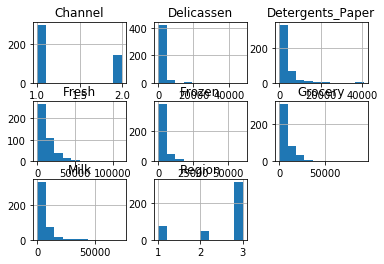

In [12]:
customers.hist()

([array([440.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([440.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([267., 109.,  38.,  16.,   4.,   3.,   2.,   0.,   0.,   1.]),
  array([389.,  37.,   8.,   3.,   2.,   0.,   1.,   0.,   0.,   0.]),
  array([340.,  75.,  17.,   3.,   2.,   1.,   1.,   0.,   1.,   0.]),
  array([422.,  15.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.]),
  array([415.,  20.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([436.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.])],
 array([1.00000e+00, 1.12160e+04, 2.24310e+04, 3.36460e+04, 4.48610e+04,
        5.60760e+04, 6.72910e+04, 7.85060e+04, 8.97210e+04, 1.00936e+05,
        1.12151e+05]),
 <a list of 8 Lists of Patches objects>)

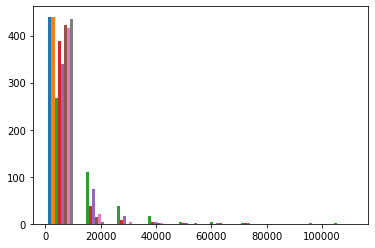

In [13]:
plt.hist(customers.values)

In [14]:
#Data is skewed

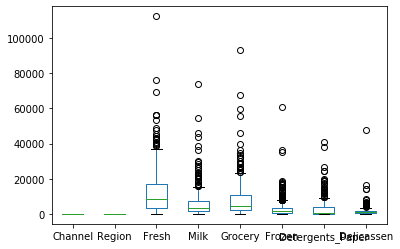

In [15]:
customers.plot.box()

In [16]:
Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Channel                 1.00
Region                  1.00
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64


In [17]:
print((customers < (Q1 - 1.5 * IQR)) |(customers > (Q3 + 1.5 * IQR)))

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0      False   False  False  False    False   False             False   
1      False   False  False  False    False   False             False   
2      False   False  False  False    False   False             False   
3      False   False  False  False    False   False             False   
4      False   False  False  False    False   False             False   
..       ...     ...    ...    ...      ...     ...               ...   
435    False   False  False  False    False    True             False   
436    False   False   True  False    False   False             False   
437    False   False  False  False     True   False              True   
438    False   False  False  False    False   False             False   
439    False   False  False  False    False   False             False   

     Delicassen  
0         False  
1         False  
2          True  
3         False  
4          True  
..          ...

In [18]:
customers_out = customers[~((customers < (Q1 - 1.5 * IQR)) |(customers> (Q3 + 1.5 * IQR))).any(axis=1)]
customers_out.shape

(332, 8)

In [19]:
# Your observations here
#440 transactions in customers DF classified in diferent grocery category. The number show 
#monetary units. 

#What does each column mean?: 
###1) FRESH: annual spending (m.u.) on fresh products (Continuous);
###2) MILK: annual spending (m.u.) on milk products (Continuous);
###3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
###4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
###5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
###6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
###7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
###8) REGION: customers Region  Lisbon, Oporto or Other (Nominal) 

#Any categorical data to convert? all data is numeric
#Any missing data to remove? N/A
#Column collinearity - any high correlations? 
###the srongest correlation is between Grocery and Detergent_Paper. We could also point out Milk and Grocery. 
#Descriptive statistics - any outliers to remove? 108 ouliers to be removed
#Column-wise data distribution - is the distribution skewed? yes it is skewed.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [20]:
# Your code here




In [21]:
# Your comment here
#Because data is skewed it does need transformation. 
#There were ouliers we already cleaned = customers_out

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [36]:
columns = (customers.columns)

In [37]:
columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [41]:
# Your import here:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Your code here:


transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', transformer, columns)])






In [42]:
customers_prep = pd.DataFrame(data=preprocessor.fit_transform(customers_out))

In [61]:
customers_prep

,0,1,2,3,4,5,6,7
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949
...,...,...,...,...,...,...,...,...
327,-0.633122,0.590092,1.419665,-0.876407,-0.222926,-0.934752,-0.269195,-0.755184
328,-0.633122,0.590092,-0.928323,-0.264181,-0.871064,-0.188850,-0.683883,0.525319
329,-0.633122,0.590092,0.881474,-0.054547,0.421038,-0.689050,0.175783,-0.216984
330,-0.633122,0.590092,0.091122,-0.632529,-0.724184,-0.483809,-0.764090,1.346590


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

### UMAP

In [44]:
K_means = customers_prep.to_numpy()

In [45]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(K_means.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [57]:
embedding_k = reducer.transform(K_means.data)



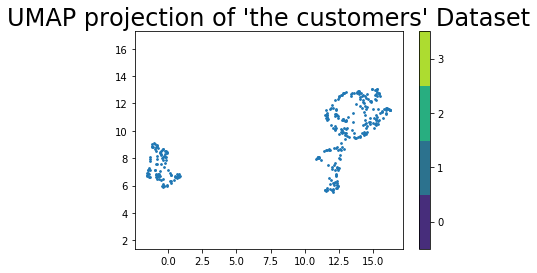

In [52]:
plt.scatter(embedding_k[:, 0], embedding_k[:, 1], cmap='Spectral', s=3)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(5)-0.5).set_ticks(np.arange(5))
plt.title("UMAP projection of 'the customers' Dataset", fontsize=24);

In [60]:
# Your code here:

kmeans = KMeans(n_clusters=5, random_state=0).fit(customers_prep)
customers_out['labels'] = kmeans.labels_

/Users/stefaniabraca/miniconda3/envs/data_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Count the values in `labels`.

In [65]:
# Your code here:
customers_out['labels'].value_counts()

1    104
0     95
4     49
3     48
2     36
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [66]:
# Your code here

from sklearn.cluster import DBSCAN
DBSCAN = DBSCAN(eps=0.5).fit(customers_prep)
customers_out['labels_DBSCAN'] = DBSCAN.labels_
customers_out.head()


/Users/stefaniabraca/miniconda3/envs/data_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,k_labels,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,0,-1
3,1,3,13265,1196,4221,6404,507,1788,0,2,-1
5,2,3,9413,8259,5126,666,1795,1451,1,0,-1
6,2,3,12126,3199,6975,480,3140,545,3,0,-1


Count the values in `labels_DBSCAN`.

In [67]:
# Your code here
customers_out['labels_DBSCAN'].value_counts()

-1    308
 0     24
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [27]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [28]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [29]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [30]:
# Your code here:


Which algorithm appears to perform better?

In [31]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [32]:
# Your code here

In [33]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [34]:
# Your code here

In [35]:
# Your comment here